In [1]:
import galsim
import numpy as np
from astropy.utils.console import ProgressBar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_atm(seed=1, nlayers=6, max_speed=20, r0_500=0.16, npix=512, screen_scale=0.16, L0=None):
    screen_size = npix*screen_scale
    rng = galsim.BaseDeviate(seed)
    u = galsim.UniformDeviate(rng)

    Ellerbroek_alts = [0.0, 2.58, 5.16, 7.73, 12.89, 15.46]  # km
    Ellerbroek_weights = [0.652, 0.172, 0.055, 0.025, 0.074, 0.022]
    Ellerbroek_interp = galsim.LookupTable(Ellerbroek_alts, Ellerbroek_weights,
                                           interpolant='linear')

    alts = np.max(Ellerbroek_alts)*np.arange(nlayers)/(nlayers-1)
    weights = Ellerbroek_interp(alts)  # interpolate the weights
    weights /= sum(weights)  # and renormalize

    spd = []  # Wind speed in m/s
    dirn = [] # Wind direction in radians
    for i in range(nlayers):
        spd.append(u()*max_speed)  # Use a random speed between 0 and max_speed
        dirn.append(u()*360*galsim.degrees)  # And an isotropically distributed wind direction.

    # Additionally, we set the screen size and scale.
    atm = galsim.Atmosphere(r0_500=r0_500, r0_weights=weights, L0=L0,
                            speed=spd, direction=dirn, altitude=alts, rng=rng,
                            screen_size=screen_size, screen_scale=screen_scale)
    return atm

In [3]:
def size_vs_wave(**kwargs):
    atm = get_atm(**kwargs)
    print(atm)
    waves = np.linspace(500, 900, 10)
    radii = []
    aper = galsim.Aperture(diam=8.4, obscuration=0.6)
    with ProgressBar(len(waves), ipython_widget=True) as bar:
        for wave in waves:
            psf = atm.makePSF(lam=wave, t0=0.0, exptime=15.0, time_step=0.1, aper=aper)
            img = psf.drawImage(nx=64, ny=64, scale=0.05, method='no_pixel')
            mom = galsim.hsm.FindAdaptiveMom(img)
            radii.append(mom.moments_sigma)
            bar.update()
    plt.scatter(waves, radii)
    plt.plot(waves, radii[0]*(waves/500)**(-0.2), c='r')
    yrange = np.min(radii), np.max(radii)
    yspan = yrange[1]-yrange[0]
    yrange = yrange[0]-yspan*0.2, yrange[1]+yspan*0.2
    plt.ylim(yrange)

galsim.PhaseScreenList([galsim.AtmosphericScreen(altitude=0.0),galsim.AtmosphericScreen(altitude=3.092),galsim.AtmosphericScreen(altitude=6.184),galsim.AtmosphericScreen(altitude=9.276),galsim.AtmosphericScreen(altitude=12.368),galsim.AtmosphericScreen(altitude=15.46)])



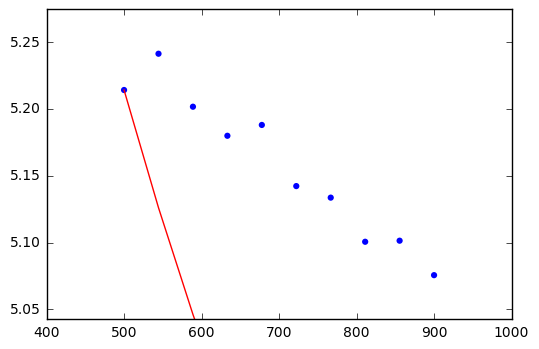

In [4]:
size_vs_wave(npix=512)

galsim.PhaseScreenList([galsim.AtmosphericScreen(altitude=0.0),galsim.AtmosphericScreen(altitude=3.092),galsim.AtmosphericScreen(altitude=6.184),galsim.AtmosphericScreen(altitude=9.276),galsim.AtmosphericScreen(altitude=12.368),galsim.AtmosphericScreen(altitude=15.46)])



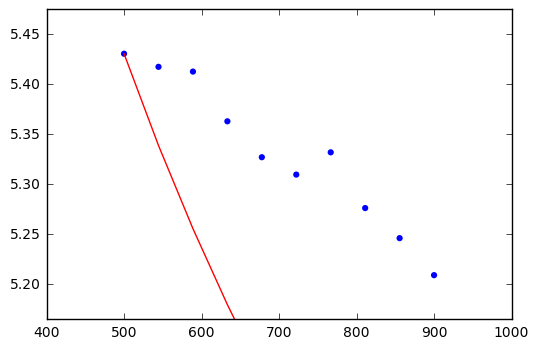

In [5]:
size_vs_wave(npix=2048)

galsim.PhaseScreenList([galsim.AtmosphericScreen(altitude=0.0),galsim.AtmosphericScreen(altitude=3.092),galsim.AtmosphericScreen(altitude=6.184),galsim.AtmosphericScreen(altitude=9.276),galsim.AtmosphericScreen(altitude=12.368),galsim.AtmosphericScreen(altitude=15.46)])



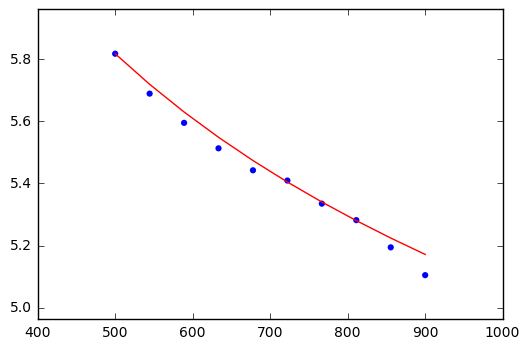

In [6]:
size_vs_wave(npix=512, screen_scale=0.04)

galsim.PhaseScreenList([galsim.AtmosphericScreen(altitude=0.0),galsim.AtmosphericScreen(altitude=3.092),galsim.AtmosphericScreen(altitude=6.184),galsim.AtmosphericScreen(altitude=9.276),galsim.AtmosphericScreen(altitude=12.368),galsim.AtmosphericScreen(altitude=15.46)])



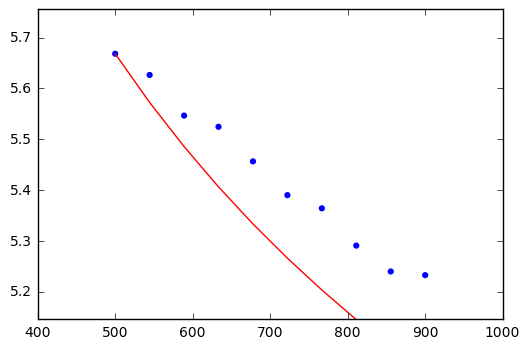

In [7]:
size_vs_wave(npix=512, screen_scale=0.08)